In [1]:
# Setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gaitsetpy as gsp
from gaitsetpy.dataset import HARUPLoader
from gaitsetpy.features import HARUPFeatureExtractor
from gaitsetpy.eda.visualization import plot_sensor_timeseries, plot_all_sensors, plot_activity_distribution
from gaitsetpy.eda.analyzers import harup_basic_stats, harup_missing_data_report, harup_activity_stats
from gaitsetpy.classification.models import get_classification_model

DATA_DIR = os.path.join('data', 'harup')
print(f"Data dir: {DATA_DIR}")


Data dir: data\harup


In [2]:
# 1) Load HAR-UP
loader = HARUPLoader()
data, names = loader.load_data(DATA_DIR)
if not data:
    print("No data loaded. Please download the HAR-UP dataset. See https://sites.google.com/up.edu.mx/har-up/")
else:
    print(f"Loaded {len(data)} recordings. First: {names[0]}")
    print("Columns:", list(data[0].columns)[:10])
    display(data[0].head())


Directory data\harup does not exist. Attempting to download HAR-UP dataset...

HAR-UP DATASET DOWNLOAD
The HAR-UP dataset can be downloaded automatically or manually.

Options:
1. Automatic download (recommended)
2. Manual download
3. Skip download (if you already have the dataset elsewhere)

This may take some time depending on your internet connection...


Download Progress: 100%|██████████| 441k/441k [00:00<00:00, 1.18MiB/s]


Download completed successfully! File saved to: data\harup\HAR-UP_Dataset.zip

Extracting the downloaded ZIP file...
Extraction failed: DataSet directory not found after extraction.
Extracting HAR-UP dataset zip to: data\harup
Extraction complete.
HAR-UP dataset not found after download attempt.
Please ensure the dataset is organized in the following structure:
DataSet/Subject{i}/Activity{j}/Trial{k}/Subject{i}Activity{j}Trial{k}.csv
[HARUP] Loaded columns for S01_A01_T01.csv: ['TIME', 'HELMET_RAW', 'BELT_ACC_X', 'BELT_ACC_Y', 'BELT_ACC_Z', 'BELT_ANG_X', 'BELT_ANG_Y', 'BELT_ANG_Z', 'BELT_LUMINOSITY', 'NECK_ACC_X', 'NECK_ACC_Y', 'NECK_ACC_Z', 'NECK_ANG_X', 'NECK_ANG_Y', 'NECK_ANG_Z', 'NECK_LUMINOSITY', 'PCKT_ACC_X', 'PCKT_ACC_Y', 'PCKT_ACC_Z', 'PCKT_ANG_X', 'PCKT_ANG_Y', 'PCKT_ANG_Z', 'PCKT_LUMINOSITY', 'WRST_ACC_X', 'WRST_ACC_Y', 'WRST_ACC_Z', 'WRST_ANG_X', 'WRST_ANG_Y', 'WRST_ANG_Z', 'WRST_LUMINOSITY', 'IR_1', 'IR_2', 'IR_3', 'IR_4']
[HARUP] Loaded columns for S01_A01_T02.csv: ['TIME'

,TIME,HELMET_RAW,BELT_ACC_X,BELT_ACC_Y,BELT_ACC_Z,BELT_ANG_X,BELT_ANG_Y,BELT_ANG_Z,BELT_LUMINOSITY,NECK_ACC_X,...,WRST_ANG_Z,WRST_LUMINOSITY,IR_1,IR_2,IR_3,IR_4,subject_id,activity_id,trial_id,activity_label
0,24-May-2018 11:36:37,51.9,0.953571,-0.015700,0.166557,-0.778000,-0.157000,0.0494,477.936200,0.966967,...,0.172500,336.511000,1,1.0,1.0,1.0,1,1,1,Walking
1,24-May-2018 11:36:37,51.9,0.953571,-0.015700,0.166557,-0.778000,-0.157000,0.0494,477.936200,0.966967,...,0.172500,336.511000,1,1.0,1.0,1.0,1,1,1,Walking
2,24-May-2018 11:36:37,51.9,0.953571,-0.015700,0.166557,-0.778000,-0.157000,0.0494,477.936200,0.966967,...,0.172500,336.511000,1,1.0,1.0,1.0,1,1,1,Walking
3,24-May-2018 11:36:37,51.9,0.953571,-0.015700,0.166557,-0.778000,-0.157000,0.0494,477.936200,0.966967,...,0.172500,336.511000,1,1.0,1.0,1.0,1,1,1,Walking
4,24-May-2018 11:36:38,52.0,0.947333,-0.015067,0.190633,1.553111,1.214667,0.5300,494.419667,0.970200,...,-0.416833,347.984333,1,1.0,1.0,1.0,1,1,1,Walking


Basic stats:
                  count        mean         std          min         25%  \
HELMET_RAW       3240.0   45.457652  663.894733 -2048.000000  -21.000000   
BELT_ACC_X       3240.0    0.710545    0.360265    -0.297583    0.616758   
BELT_ACC_Y       3240.0    0.031494    0.076581    -0.334067   -0.015850   
BELT_ACC_Z       3240.0    0.114736    0.523624    -1.012500   -0.237557   
BELT_ANG_X       3240.0    0.130958   29.844158  -127.985714   -4.458429   
BELT_ANG_Y       3240.0   -0.785168   22.366477  -222.296667   -2.635571   
BELT_ANG_Z       3240.0    0.584176    9.566540   -53.260000   -0.197571   
BELT_LUMINOSITY  3240.0  395.693735  274.002708     0.000000  251.948000   
NECK_ACC_X       3240.0   -0.775235    0.364601    -1.091900   -0.918120   
NECK_ACC_Y       3240.0    0.126316    0.268196    -1.292920    0.007860   
NECK_ACC_Z       3240.0   -0.477298    0.184230    -0.963775   -0.549860   
NECK_ANG_X       3240.0   -0.222024   18.604547  -177.225000   -1.112400   

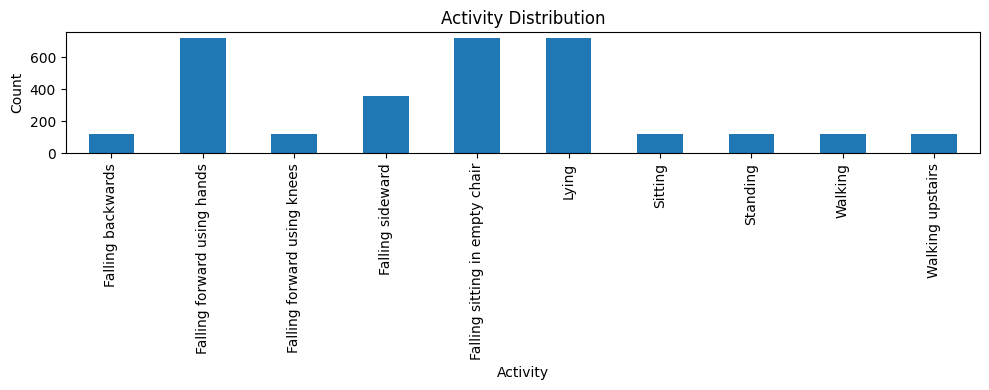


Plotting all sensors...


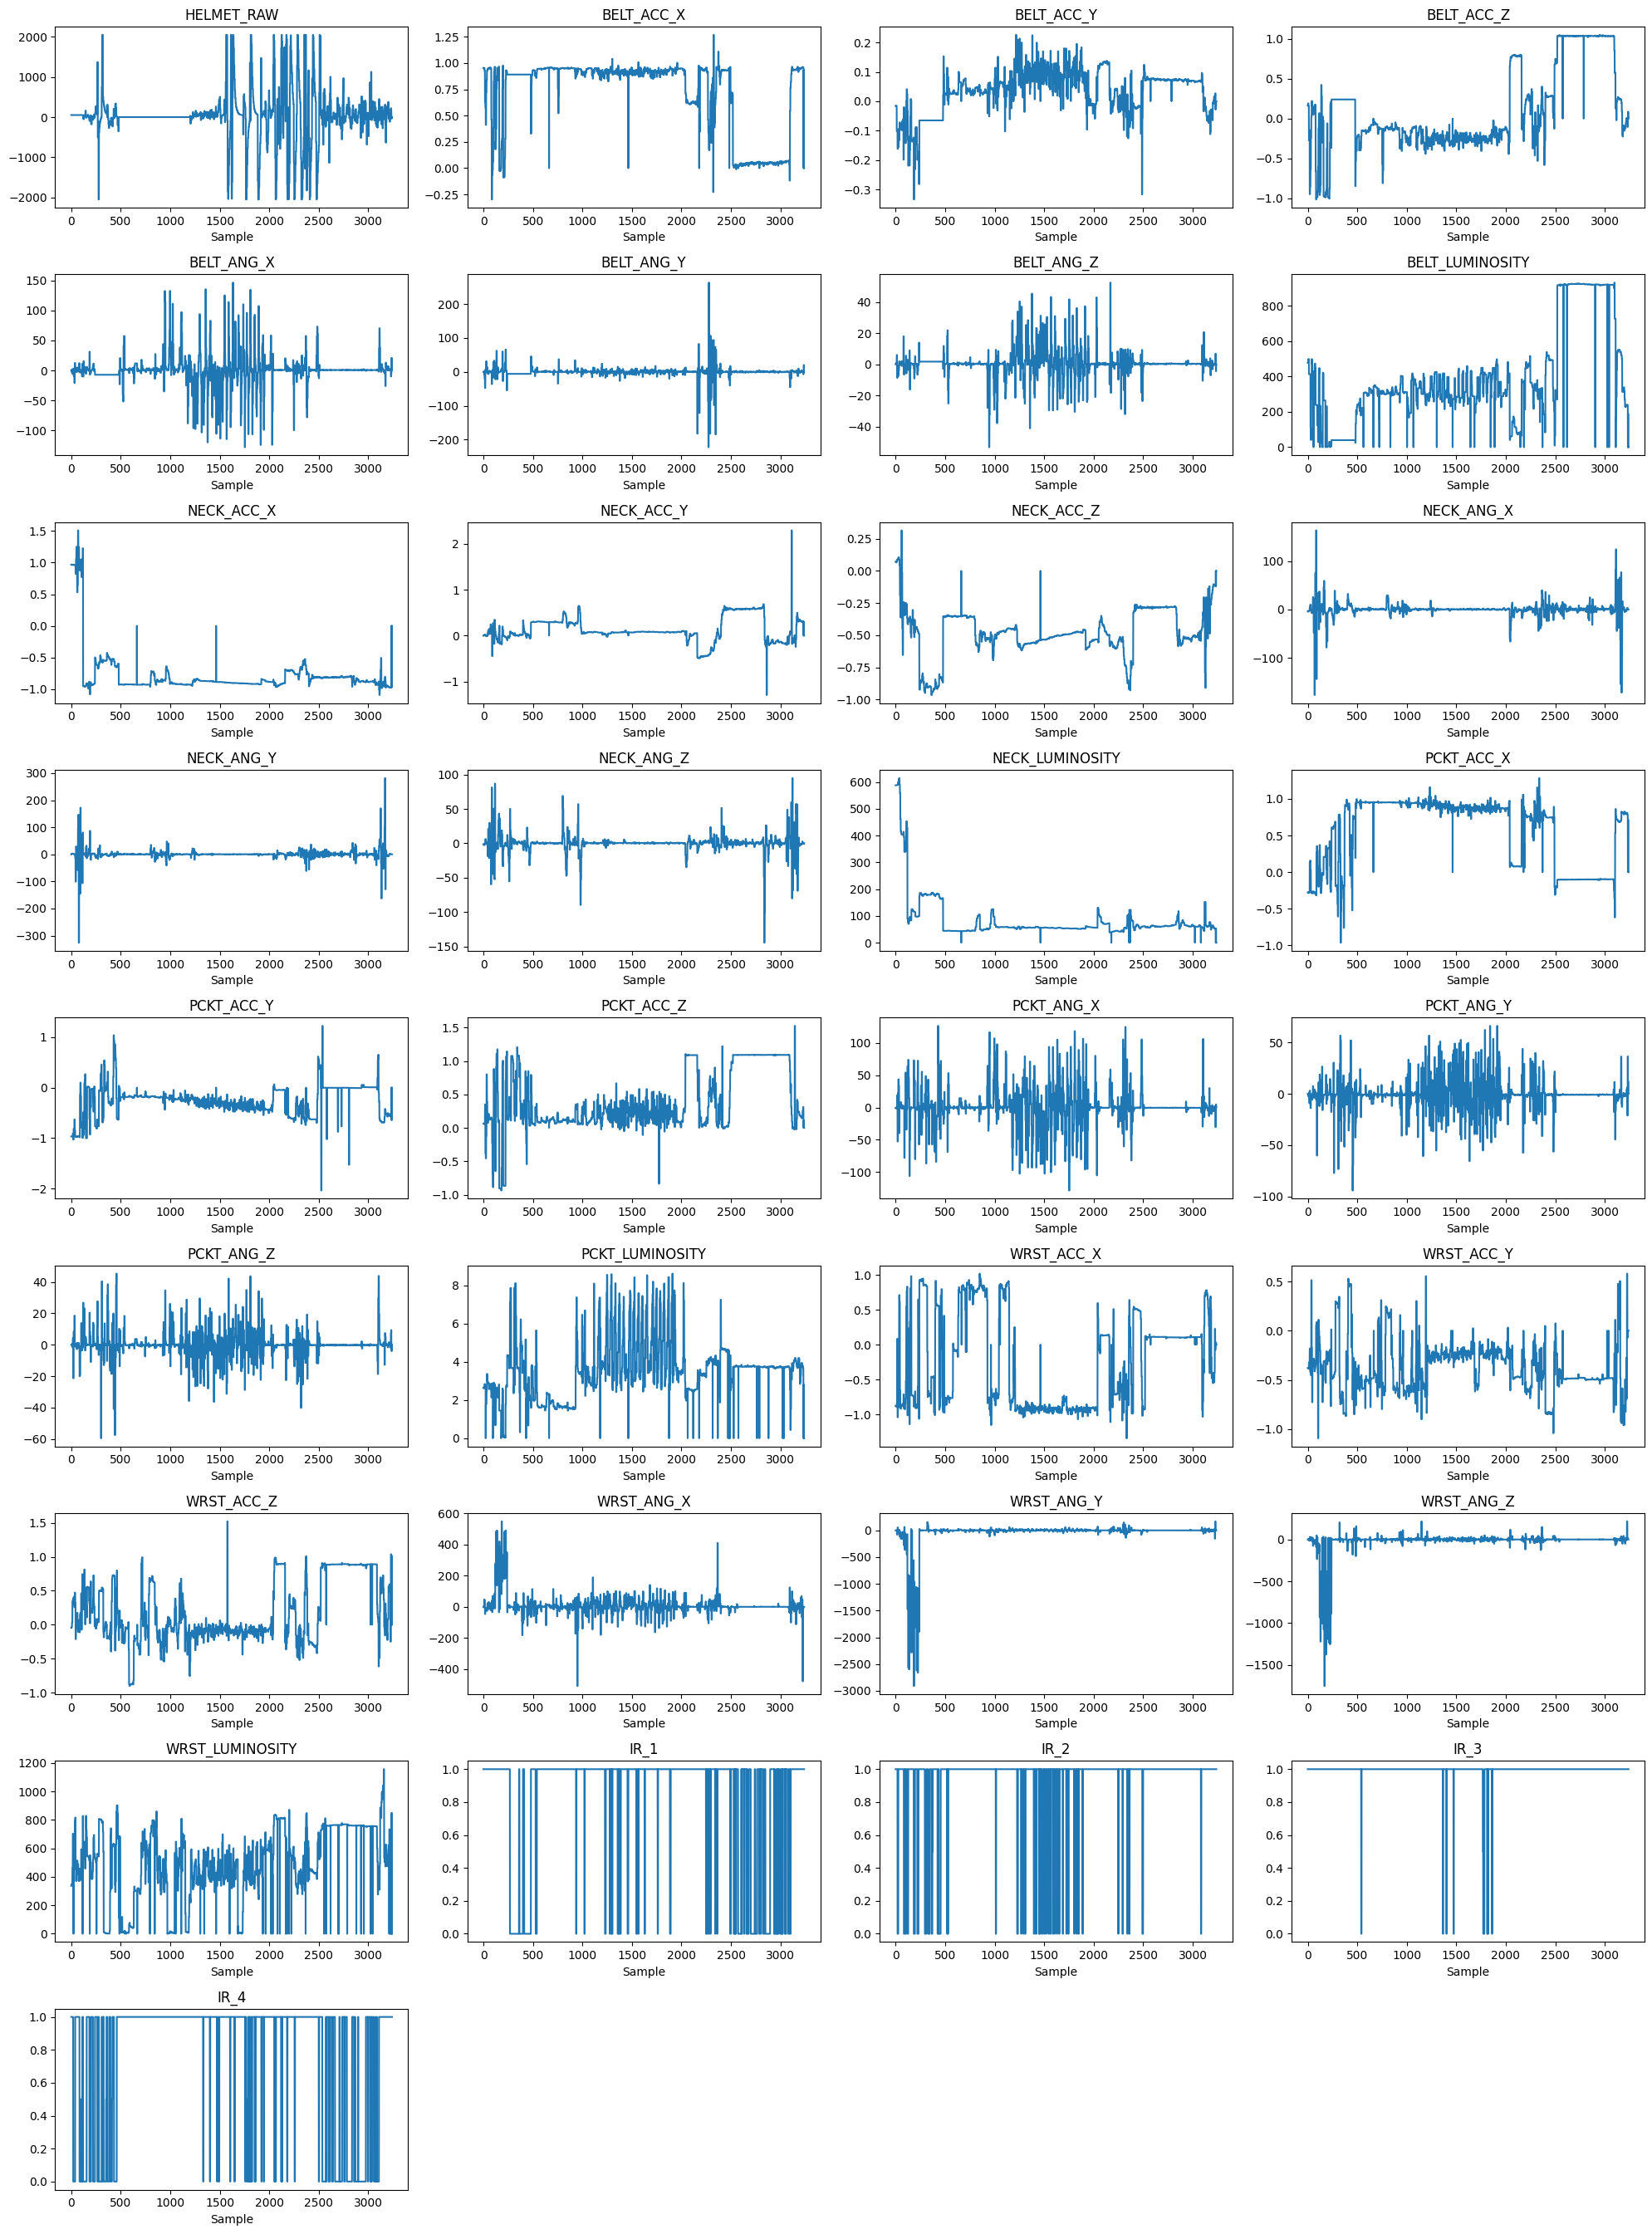


Plotting BELT_ACC_X...


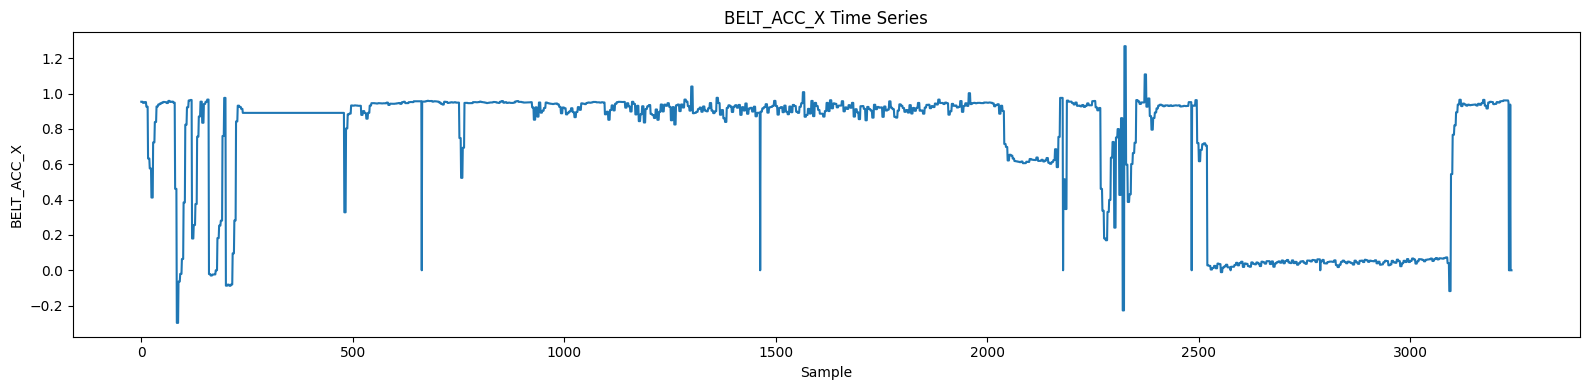

In [3]:
# 2) EDA & Visualization (on first recording)
if data:
    print("Basic stats:")
    harup_basic_stats(data[0])
    print("\nMissing data report:")
    harup_missing_data_report(data[0])
    print("\nActivity stats:")
    harup_activity_stats(data[0])
    print("\nPlotting activity distribution...")
    plot_activity_distribution(data[0])
    print("\nPlotting all sensors...")
    plot_all_sensors(data[0])
    print("\nPlotting BELT_ACC_X...")
    plot_sensor_timeseries(data[0], 'BELT_ACC_X')


In [4]:
# 3) Sliding windows
window_size = 100
step_size = 50
if data:
    windows = loader.create_sliding_windows(data, names, window_size, step_size)
    print(f"Created {len(windows)} window sets")
else:
    windows = []


Created 4 window sets


In [5]:
# 4) Extract features using HARUPFeatureExtractor
if windows:
    features_data = loader.extract_features(windows)
    print(f"Extracted features for {len(features_data)} recordings")
else:
    features_data = []


Extracting features from 33 sensor windows
Processing BELT_ACC_X with 63 windows
Processing BELT_ACC_Y with 63 windows


C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:124: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["skewness"] = skew(window_data)
C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["kurtosis"] = kurtosis(window_data)


Processing BELT_ACC_Z with 63 windows
Processing BELT_ANG_X with 63 windows
Processing BELT_ANG_Y with 63 windows
Processing BELT_ANG_Z with 63 windows
Processing BELT_LUMINOSITY with 63 windows
Processing NECK_ACC_X with 63 windows
Processing NECK_ACC_Y with 63 windows
Processing NECK_ACC_Z with 63 windows
Processing NECK_ANG_X with 63 windows
Processing NECK_ANG_Y with 63 windows
Processing NECK_ANG_Z with 63 windows
Processing NECK_LUMINOSITY with 63 windows
Processing PCKT_ACC_X with 63 windows
Processing PCKT_ACC_Y with 63 windows
Processing PCKT_ACC_Z with 63 windows
Processing PCKT_ANG_X with 63 windows
Processing PCKT_ANG_Y with 63 windows
Processing PCKT_ANG_Z with 63 windows
Processing PCKT_LUMINOSITY with 63 windows
Processing WRST_ACC_X with 63 windows
Processing WRST_ACC_Y with 63 windows
Processing WRST_ACC_Z with 63 windows
Processing WRST_ANG_X with 63 windows
Processing WRST_ANG_Y with 63 windows
Processing WRST_ANG_Z with 63 windows
Processing WRST_LUMINOSITY with 63 

C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:124: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["skewness"] = skew(window_data)
C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["kurtosis"] = kurtosis(window_data)
C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:124: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["skewness"] = skew(window_data)
C:\Users\ahars\AppData\Roaming\Python\Pyth

Processing IR_3 with 63 windows
Processing IR_4 with 63 windows
Extracting features from 33 sensor windows
Processing BELT_ACC_X with 66 windows
Processing BELT_ACC_Y with 66 windows
Processing BELT_ACC_Z with 66 windows
Processing BELT_ANG_X with 66 windows
Processing BELT_ANG_Y with 66 windows
Processing BELT_ANG_Z with 66 windows
Processing BELT_LUMINOSITY with 66 windows
Processing NECK_ACC_X with 66 windows
Processing NECK_ACC_Y with 66 windows
Processing NECK_ACC_Z with 66 windows
Processing NECK_ANG_X with 66 windows
Processing NECK_ANG_Y with 66 windows
Processing NECK_ANG_Z with 66 windows
Processing NECK_LUMINOSITY with 66 windows
Processing PCKT_ACC_X with 66 windows
Processing PCKT_ACC_Y with 66 windows
Processing PCKT_ACC_Z with 66 windows
Processing PCKT_ANG_X with 66 windows
Processing PCKT_ANG_Y with 66 windows
Processing PCKT_ANG_Z with 66 windows
Processing PCKT_LUMINOSITY with 66 windows
Processing WRST_ACC_X with 66 windows
Processing WRST_ACC_Y with 66 windows
Proc

C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:124: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["skewness"] = skew(window_data)
C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["kurtosis"] = kurtosis(window_data)
C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:124: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["skewness"] = skew(window_data)
C:\Users\ahars\AppData\Roaming\Python\Pyth

Processing IR_3 with 66 windows
Processing IR_4 with 66 windows
Extracting features from 33 sensor windows
Processing BELT_ACC_X with 66 windows
Processing BELT_ACC_Y with 66 windows
Processing BELT_ACC_Z with 66 windows
Processing BELT_ANG_X with 66 windows
Processing BELT_ANG_Y with 66 windows
Processing BELT_ANG_Z with 66 windows
Processing BELT_LUMINOSITY with 66 windows
Processing NECK_ACC_X with 66 windows
Processing NECK_ACC_Y with 66 windows
Processing NECK_ACC_Z with 66 windows
Processing NECK_ANG_X with 66 windows
Processing NECK_ANG_Y with 66 windows
Processing NECK_ANG_Z with 66 windows
Processing NECK_LUMINOSITY with 66 windows
Processing PCKT_ACC_X with 66 windows
Processing PCKT_ACC_Y with 66 windows
Processing PCKT_ACC_Z with 66 windows
Processing PCKT_ANG_X with 66 windows
Processing PCKT_ANG_Y with 66 windows
Processing PCKT_ANG_Z with 66 windows
Processing PCKT_LUMINOSITY with 66 windows
Processing WRST_ACC_X with 66 windows
Processing WRST_ACC_Y with 66 windows
Proc

C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:124: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["skewness"] = skew(window_data)
C:\Users\ahars\AppData\Roaming\Python\Python313\site-packages\gaitsetpy\features\harup_features.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features["kurtosis"] = kurtosis(window_data)


Processing IR_1 with 51 windows
Processing IR_2 with 51 windows
Processing IR_3 with 51 windows
Processing IR_4 with 51 windows
Extracted features for 4 recordings


In [6]:
# 5) Prepare features for classification
import numpy as np

def to_scalar(x):
    if isinstance(x, (list, np.ndarray)):
        if len(x) == 0:
            return 0.0
        return float(np.mean(x))
    return float(x)

feature_dicts = []
if features_data:
    for rec in features_data:
        name = rec["name"]
        features_list = rec["features"]
        if not features_list:
            continue
        feature_keys = [k for k in features_list[0].keys() if k not in ("sensor", "label")]
        features_map = {k: [to_scalar(f.get(k, 0)) for f in features_list] for k in feature_keys}
        annotations = [f["label"] for f in features_list if "label" in f]
        feature_dicts.append({"name": name, "features": features_map, "annotations": annotations})

print(f"Prepared {len(feature_dicts)} feature dicts")


Prepared 4 feature dicts


In [ ]:
# 6) Train and evaluate multiple models
if feature_dicts:
    from pprint import pprint
    model_names = ['random_forest', 'mlp', 'lstm', 'bilstm', 'cnn', 'gnn']
    for model_name in model_names:
        print(f"\n--- {model_name.upper()} ---")  # Fixed: use .upper() not .UPPER()
        kwargs = {}
        try:
            X_tmp = []
            y_tmp = []
            feat_keys = list(feature_dicts[0]['features'].keys()) if feature_dicts[0]['features'] else []
            n = min(len(feature_dicts[0]['annotations']), len(next(iter(feature_dicts[0]['features'].values())))) if feat_keys else 0
            for i in range(n):
                X_tmp.append([float(feature_dicts[0]['features'][k][i]) for k in feat_keys])
                y_tmp.append(feature_dicts[0]['annotations'][i])
            import numpy as _np
            X_tmp = _np.array(X_tmp, dtype=_np.float32) if X_tmp else None
            num_classes = len(_np.unique(y_tmp)) if y_tmp else None
            if X_tmp is not None:
                if model_name == 'cnn':
                    kwargs['input_channels'] = X_tmp.shape[1]
                if model_name in ['lstm', 'bilstm']:
                    kwargs['input_size'] = X_tmp.shape[1]
                if model_name in ['cnn', 'lstm', 'bilstm'] and num_classes is not None:
                    kwargs['num_classes'] = int(num_classes)
                if model_name == 'gnn' and num_classes is not None:
                    kwargs['input_dim'] = X_tmp.shape[1]
                    kwargs['output_dim'] = int(num_classes)
        except Exception:
            pass
        try:
            model = get_classification_model(model_name, **{k: v for k, v in kwargs.items() if v is not None})
        except Exception as e:
            print(f"Could not instantiate {model_name}: {e}")
            continue
        train_kwargs = {}
        eval_kwargs = {}
        if model_name == 'gnn':
            total_windows = sum(len(fd['annotations']) for fd in feature_dicts)
            adj = _np.eye(total_windows, dtype=_np.float32)
            train_kwargs['adjacency_matrix'] = adj
            eval_kwargs['adjacency_matrix'] = adj
        try:
            model.train(feature_dicts, **train_kwargs)
            metrics = model.evaluate(feature_dicts, detailed_report=True, **eval_kwargs)
            print("Classification Report:")
            if 'classification_report' in metrics:
                pprint(metrics['classification_report'])
            else:
                print("No detailed report available.")
        except Exception as e:
            print(f"Training/evaluation failed for {model_name}: {e}")
else:
    print("No features to train models.")


AttributeError: 'str' object has no attribute 'UPPER'